In [1]:
import numpy as np
import pandas as pd
import sim_fa as sf
import factor_analysis as fa
import matplotlib.pyplot as plt

# simulate from a factor analysis model
fa_simulator = sf.sim_fa(20,5,model_type='fa',rand_seed=0)
X = fa_simulator.sim_data(1000,rand_seed=0)
sim_params = fa_simulator.get_params()

# # fit fa model
# model = fa.factor_analysis(model_type='fa')
# log_L = model.train(X,5,verbose=False,rand_seed=0)
# fit_params = model.get_params()

# cross-validation
model = fa.factor_analysis(model_type='fa')
LLs,zDim_list,max_LL,zDim = model.crossvalidate(X)



Crossvalidating FA model to choose # of dims...
   Fold  1  of  10 ...
   Fold  2  of  10 ...
   Fold  3  of  10 ...
   Fold  4  of  10 ...
   Fold  5  of  10 ...
   Fold  6  of  10 ...
   Fold  7  of  10 ...
   Fold  8  of  10 ...
   Fold  9  of  10 ...
   Fold  10  of  10 ...


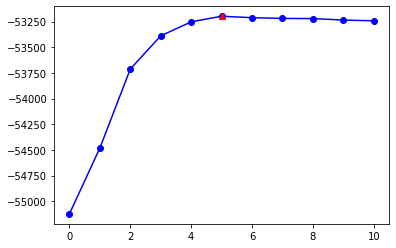

In [2]:
# # plot fa fitting log-likelihood (no cross-validation)
# plt.figure(0)
# plt.plot(log_L)
# plt.xlabel('iteration')
# plt.ylabel('log likelihood')
# plt.title('factor analysis, LL curve')
# plt.show()

# plot cross-validation curve
plt.figure(0)
plt.plot(zDim_list,LLs,'bo-')
plt.plot(zDim,max_LL,'r^')
plt.show()

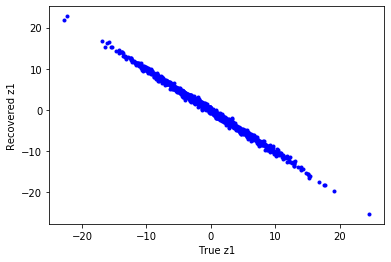

In [3]:
# get latents and compare recovered latents vs true latents
z_fit,LL_fit = model.estep(X)
z_fit,Lorth = model.orthogonalize(z_fit['z_mu'])

sim_model = fa.factor_analysis(model_type='fa')
sim_model.set_params(sim_params)
z_true,LL_true = sim_model.estep(X)
z_true,Lorth = sim_model.orthogonalize(z_true['z_mu'])

plt.figure(1)
plt.plot(z_true[:,0],z_fit[:,0],'b.')
plt.xlabel('True z1')
plt.ylabel('Recovered z1')
plt.show()